In [72]:
import pandas as pd

In [73]:
import numpy as np

In [74]:
import matplotlib.pyplot as plt

In [75]:
import seaborn as sns

In [76]:
import sklearn.datasets

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
from xgboost import XGBRegressor

In [79]:
from sklearn import metrics

In [80]:
house_price_dataset=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [81]:
house_price_dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [82]:
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [83]:
house_price_dataframe=house_price_dataset.rename(columns={'medv':'Price'})

In [84]:
correlation=house_price_dataframe.corr()

In [85]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Axes: >

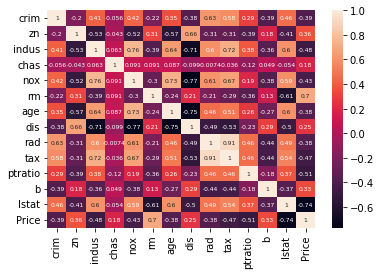

In [86]:
sns.heatmap(correlation,annot=True,annot_kws={"size":6})

In [87]:
X=house_price_dataframe.drop(columns=["Price"],axis=1)

In [88]:
Y=house_price_dataframe["Price"]

In [89]:
print(X)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [90]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.1,random_state=2)

In [92]:
print(X_train.shape,X.shape,X_test.shape)

(455, 13) (506, 13) (51, 13)


In [93]:
model=XGBRegressor()

In [94]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
# accuracy for prediction on training data

In [96]:
training_data_prediction= model.predict(X_train)

In [97]:
training_data_prediction

array([30.700191 ,  4.9932404, 35.41034  , 27.885824 , 18.406742 ,
       18.49066  , 17.569878 , 15.628974 , 22.385124 , 20.312454 ,
       20.599113 , 19.756544 , 28.243296 , 35.055347 , 27.439743 ,
       48.497223 , 27.500408 , 11.499303 , 22.021729 , 13.215574 ,
        7.415963 , 20.563751 , 20.088236 , 25.156513 , 22.014557 ,
       19.152746 , 24.2804   , 19.391594 , 23.90676  , 34.897984 ,
       19.35735  , 21.38267  , 26.6121   , 37.60805  , 36.002777 ,
       21.304255 , 23.656301 , 24.82135  , 19.921257 , 20.898674 ,
       18.251581 , 10.909947 , 43.986256 , 43.49857  ,  8.307984 ,
       46.674862 , 32.90456  , 21.717325 , 14.38796  , 29.102118 ,
       23.712353 , 23.164818 , 20.962048 , 20.102373 , 34.66862  ,
       13.913268 , 13.499932 , 22.010935 , 15.175254 , 10.916521 ,
       22.692398 , 13.857255 ,  5.600335 , 29.837063 , 49.997566 ,
       34.87559  , 20.611399 , 23.362585 , 19.202517 , 32.689682 ,
       19.624306 , 26.978092 ,  8.406987 , 46.014053 , 21.7467

In [98]:
# r squared error

In [99]:
score_1= metrics.r2_score(Y_train,training_data_prediction)

In [100]:
score_1

0.9999877302824767

In [101]:
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

In [102]:
# prediction on test data

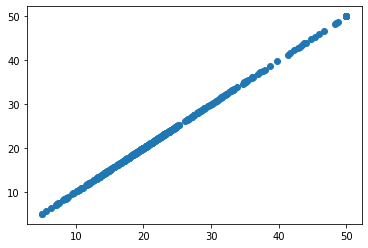

In [103]:
plt.scatter(Y_train,training_data_prediction)

In [104]:
model.fit(X_test,Y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [105]:
test_data_prediction=model.predict(X_test)

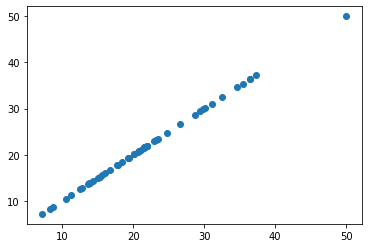

In [106]:
plt.scatter(Y_test,test_data_prediction)